In [1]:
using Plots
using LaTeXStrings

┌ Info: Recompiling stale cache file /Users/hughmurrell/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [8]:
function draw_neuron(x, y, r; c=:blue)

    θs = 0:0.1:2pi
    xs = x .+ r.*cos.(θs)
    ys = y .+ r.*sin.(θs)

    plot!(xs, ys, seriestype=:shape, c=c, alpha=0.5, aspect_ratio=1, 
        leg=false )
    
end


#neuron_coords(x, N, spacing) = range(-(N - 1)/2 * spacing, spacing, N)

"""
Vertical position of neuron in layer i, position j, with a total of N neurons
"""
neuron_coords(j, N, y_spacing) = (-(N - 1)/2 + j) * y_spacing

function draw_neurons(x, N, spacing, r; c=:blue)

    ys = neuron_coords(x, N, spacing)

    draw_neuron.(x, ys, r; c=c)

end


function draw_layer(x, spacing, N1, N2, r)

    plot!(framestyle=:none, grid=:none)

    first_x = x
    second_x = x + 1

    first = neuron_coords(x + 1, N1, spacing)
    second = neuron_coords(x, N2, spacing)

    draw_neurons(x, N1, 1, r; c=:blue)
    draw_neurons(x+1, N2, 1, r; c=:red)

    for i in 1:N1
        for j in 1:N2

            vec = [second_x - first_x, second[j] - first[i]]
            normalize!(vec)

            start = [first_x, first[i]] + 1.2*r*vec
            finish = [second_x, second[j]] - 1.2*r*vec


            plot!([start[1], finish[1]], [start[2], finish[2]], c=:black, alpha=0.5)
        end
    end

end

#draw_layer(1, 1, 3, 4, 0.2)

function draw_link(x1, y1, x2, y2, r, lab)
    vec = [x2 - x1, y2 - y1]
    #normalize!(vec) 
    vec = vec / sqrt(vec'vec)

    start = [x1, y1] + 1.2 * r * vec
    finish = [x2, y2] - 1.2 * r * vec

    plot!([start[1], finish[1]], [start[2], finish[2]], c=:black, alpha=0.5)
    annotate!([(x1 + 0.5 * (x2-x1), 0.4 + y1 + 0.5 * (y2-y1), lab)])
        
end

"""
Takes a vector of neurons per layer
"""
function draw_network(neurons_per_layer)

    x_spacing = 4
    y_spacing = 2
    r = 0.2

    num_layers = length(neurons_per_layer)

    plot(framestyle=:none, grid=:none, fmt=:png)

    # draw input links
    N1 = neurons_per_layer[1]

    for j in 1:N1
        lab = latexstring("x_{i"*string(N1-j)*"}")
        y = neuron_coords(j, N1, y_spacing)
        draw_link(0, y, 1 * x_spacing, y, r, lab)
    end

    # draw neurons
    for layer in 1:length(neurons_per_layer)
        N = neurons_per_layer[layer]

        if layer == 1
            c = :green
        elseif layer == num_layers
            c = :red
        else
            c = :blue
        end
        
        
        for j in 1:N
            lab=text("",:black,:center)
            draw_neuron(layer * x_spacing, neuron_coords(j, N, y_spacing), r, c=c)

        end
    end

    # draw links
    for layer in 1:length(neurons_per_layer)-1
        N1 = neurons_per_layer[layer]
        N2 = neurons_per_layer[layer+1]
        lab=text("",:black,:center)
        for j1 in 1:N1
                
            for j2 in 1:N2
                s = ""
                if layer == 1
                    s = "\\theta_{"*string(N1-j1)*"}"
                end
                if layer == 2
                    s = "\\sum x_{ik} \\theta_k  " 
                end
                # println(s)
                lab = latexstring(s)
                draw_link(layer * x_spacing,  neuron_coords(j1, N1, y_spacing), 
                    (layer+1) * x_spacing,
                    neuron_coords(j2, N2, y_spacing), r, lab)
            end

        end
    end

    # draw output links
    N_last = neurons_per_layer[end]

    for j in 1:N_last
        s = " \\; \\sigma \\left( \\sum x_{ik} \\theta_k  \\right)" 
        lab = latexstring(s)
        y = neuron_coords(j, N_last, y_spacing)
        draw_link(num_layers * x_spacing, y, (num_layers+1)*x_spacing, y, r, lab)
    end

    plot!()

end

draw_network

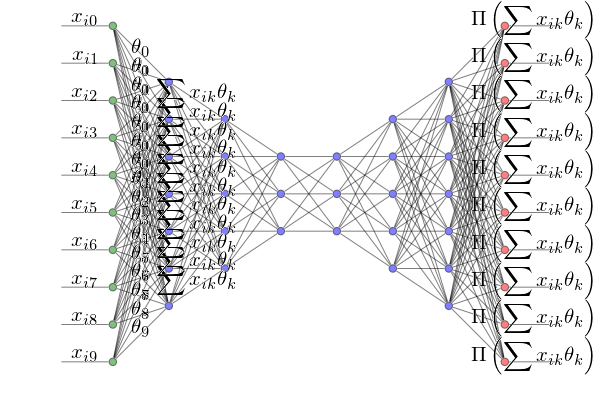

In [152]:
draw_network([10, 7, 5, 3, 3, 5, 7, 10])

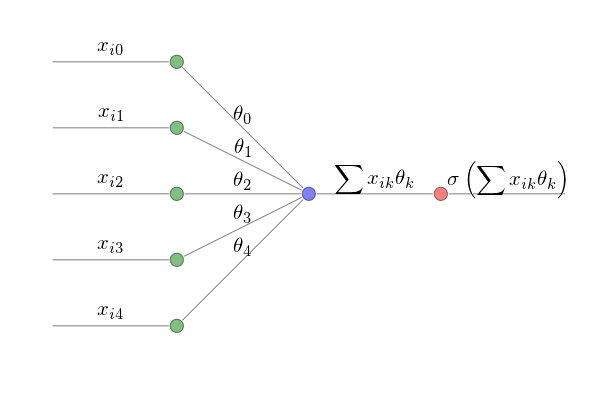

In [9]:
draw_network([5, 1, 1])

In [5]:
using Pkg
ENV["GRDIR"]=""
Pkg.build("GR")

  Building GR → `~/.julia/packages/GR/ZI5OE/deps/build.log`
